In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Problem 1

## Part 1.2

In part d of problem 1 in the last problem set, the true function $f$ is used to calculate the square-bias, which is used in the MSE decomposition.

## Part 1.3

### Subpart A

Without knowing the function $f$, we can estimate the square-bias as the average squared difference between the predicted value and the true value at the specific data point. We can also estimate the true value by using the $y$ value associated with the last $x$ value, since it is the closest to $x=1.7$. 

### Subpart B

In [93]:
df = pd.read_csv("ps2data.csv", index_col=0)

In [94]:
def polynomial_regression(x, y, x_test, degree):
    coefs = np.polyfit(x, y, degree)
    p = np.poly1d(coefs)
    y_fitted = p(x_test)
    return y_fitted

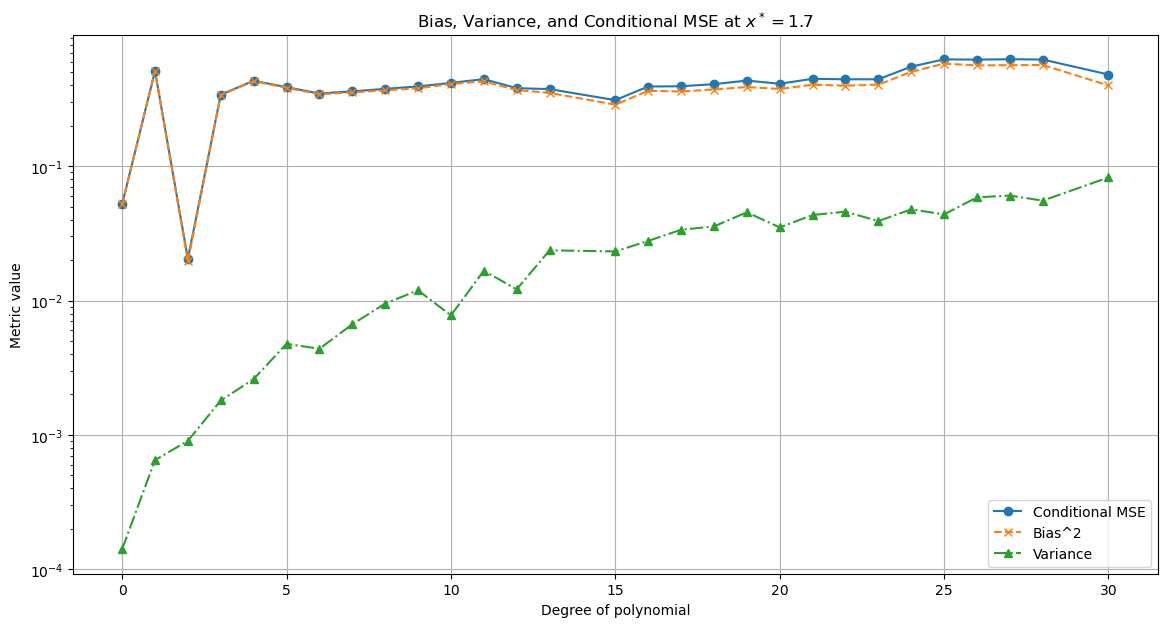

In [112]:
n_simulations = 100
degrees = np.linspace(0, 30, 29, dtype=int)
# Estimate "true" y using data
y_true = df.loc[len(df)-1, "y"]
n = len(df)

# Compute Bias and Variance
biases = []
variances = []
conditional_MSEs = []

for d in degrees:
    simulation_predictions = []
    for _ in range(n_simulations):
        sample = df.sample(n, replace=True) # is the point to replicate bootstrapping?
        y_pred = polynomial_regression(sample["x"], sample["y"], 1.7, d)
        simulation_predictions.append(y_pred)
        
    # Bias^2
    bias_sq = np.mean([(pred - y_true) ** 2 for pred in simulation_predictions])
    biases.append(bias_sq)
    # Variance
    variance = np.var(simulation_predictions)
    variances.append(variance)
    # Conditional MSE
    mse = bias_sq + variance
    conditional_MSEs.append(mse)
    
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(degrees, conditional_MSEs, marker='o', linestyle='-', label='Conditional MSE')
plt.plot(degrees, biases, marker='x', linestyle='--', label='Bias^2')
plt.plot(degrees, variances, marker='^', linestyle='-.', label='Variance')
plt.title('Bias, Variance, and Conditional MSE at $x^* = 1.7$')
plt.xlabel('Degree of polynomial')
plt.ylabel('Metric value')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()